# Convolutional Neural Network (CNN) 

## 1. CNN là gì?

CNN (Convolutional Neural Network) là một loại mạng nơ-ron nhân tạo giúp máy tính "nhìn" và hiểu ảnh, tương tự cách con người nhận diện vật thể trong đời thực. Thay vì xem toàn bộ ảnh một lúc như mạng nơ-ron thông thường (fully connected), CNN chia nhỏ ảnh ra, tìm các đặc trưng như đường thẳng, góc, vòng tròn, rồi ghép lại để đoán xem ảnh đó là gì.

**Ví dụ đời thực**: Khi ta nhìn một con mèo, không cần xem hết cả ảnh ngay lập tức. Ta nhận ra tai mèo (hình tam giác), mắt mèo (hình tròn), ria mèo (đường thẳng), rồi kết luận "Đây là mèo". CNN cũng làm như vậy bằng cách dùng các "kính lúp" nhỏ quét qua ảnh từng phần một.

**Ví dụ cụ thể**: Hãy tưởng tượng chúng ta có một ảnh số "7". CNN sẽ tìm đường ngang ở trên cùng và đường chéo bên dưới để nhận ra đó là số "7".

---

## 2. Các thành phần chính của CNN

### 2.1. Tầng tích chập (Convolution Layer)

Đây là bước quan trọng nhất, giống như "đôi mắt" của CNN, giúp tìm các đặc trưng nhỏ trong ảnh như cạnh, góc, hoặc đường cong.

#### Ý tưởng cơ bản
- chúng ta có một ảnh, giả sử kích thước là $5 \times 5$ pixel.
- Dùng một **bộ lọc** (filter/kernel), ví dụ $3 \times 3$, như một "kính lúp" nhỏ để quét qua ảnh.
- Kết quả là một **feature map** (bản đồ đặc trưng), cho biết chỗ nào trong ảnh có đặc trưng mà bộ lọc tìm được.

#### Công thức tích chập
Công thức toán học của tích chập là:

$$ S(i, j) = \sum_{m=0}^{F-1} \sum_{n=0}^{F-1} I(i+m, j+n) \cdot K(m, n) $$

- $I$: Ảnh đầu vào (input image).
- $K$: Bộ lọc (kernel/filter).
- $F$: Kích thước bộ lọc (ví dụ $F=3$ nếu là $3 \times 3$).
- $S(i, j)$: Giá trị tại vị trí $(i, j)$ trong feature map.

**Giải thích đơn giản**: Lấy từng vùng nhỏ của ảnh (cùng kích thước với bộ lọc), nhân từng số trong vùng với số tương ứng trong bộ lọc, rồi cộng tất cả lại để ra một số mới.

#### Ví dụ minh họa với số "7"
Giả sử ảnh đầu vào $5 \times 5$ là một phần của số "7":

$$ I = \begin{bmatrix} 1 & 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1 & 0 \\ 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 & 1 \end{bmatrix} $$

- Số 1 là nét vẽ của "7", số 0 là nền trắng.

Bộ lọc $K$ tìm đường ngang, kích thước $3 \times 3$:

$$ K = \begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix} $$

**Bước 1: Tính tại vị trí $(0, 0)$**:
- Lấy vùng $3 \times 3$ từ góc trên bên trái của ảnh $I$:

$$ \begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 1 \end{bmatrix} $$

- Nhân từng phần tử với bộ lọc $K$:

$$ \begin{bmatrix} 1 \cdot 1 & 1 \cdot 1 & 1 \cdot 1 \\ 0 \cdot 0 & 0 \cdot 0 & 1 \cdot 0 \\ 0 \cdot -1 & 0 \cdot -1 & 1 \cdot -1 \end{bmatrix} = \begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ 0 & 0 & -1 \end{bmatrix} $$

- Cộng tất cả các giá trị lại:

$$ 1 + 1 + 1 + 0 + 0 + 0 + 0 + 0 + (-1) = 2 $$

Vậy $S(0, 0) = 2$ (phát hiện đường ngang mạnh).

**Bước 2: Tính tại vị trí $(1, 1)$**:
- Trượt bộ lọc xuống dưới và sang phải, lấy vùng $3 \times 3$ mới:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với bộ lọc $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \\ 0 \cdot 0 & 1 \cdot 0 & 1 \cdot 0 \\ 0 \cdot -1 & 1 \cdot -1 & 0 \cdot -1 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & -1 & 0 \end{bmatrix} $$

- Cộng lại:

$$ 0 + 1 + 0 + 0 + 0 + 0 + 0 + (-1) + 0 = 0 $$

Vậy $S(1, 1) = 0$ (không có đường ngang rõ ràng ở đây).

**Feature map hoàn chỉnh**:
- Lặp lại quá trình trên cho toàn bộ ảnh, ta được feature map kích thước $3 \times 3$ (vì $5-3+1=3$):

$$ S = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

#### Hình minh họa

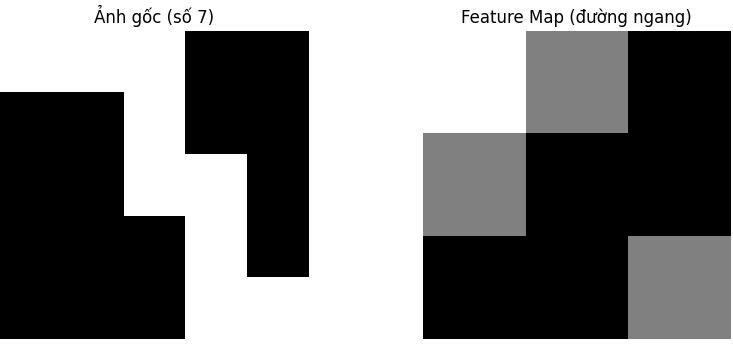

Kết quả bao gồm:
- Ảnh gốc: Số "7" đơn giản hóa với nét vẽ (1) và nền trắng (0).
- Feature map: Làm nổi bật đường ngang ở trên cùng (giá trị 2), các vùng khác ít rõ hơn (giá trị nhỏ hoặc 0).

#### Padding và Stride
- **Padding ($P$)**: Thêm số 0 quanh ảnh để giữ kích thước đầu ra. Nếu $P=0$ (như ví dụ trên), feature map nhỏ hơn ảnh gốc.
- **Stride ($S$)**: Bước trượt của bộ lọc. Nếu $S=1$ (như ví dụ), bộ lọc trượt từng pixel một; nếu $S=2$, nó nhảy cách 2 pixel.

Công thức tính kích thước đầu ra:

$$ \text{Output Height} = \frac{H - F + 2P}{S} + 1 $$

$$ \text{Output Width} = \frac{W - F + 2P}{S} + 1 $$

- $H$, $W$: Chiều cao và chiều rộng của ảnh gốc.
- Ví dụ: Với $H=W=5$, $F=3$, $P=0$, $S=1$, ta có $\frac{5-3+0}{1}+1 = 3$, đúng với kích thước feature map $3 \times 3$.

---

### 2.2. Hàm kích hoạt (ReLU)

Sau khi có feature map từ tầng tích chập, ta dùng hàm ReLU để "lọc" nó, giữ lại các đặc trưng rõ ràng và loại bỏ những phần không quan trọng.

#### Công thức
$$ \text{ReLU}(x) = \max(0, x) $$

**Giải thích đơn giản**: 
- Nếu số lớn hơn 0, giữ nguyên.
- Nếu số nhỏ hơn hoặc bằng 0, biến thành 0.

#### Ví dụ
Feature map từ số "7" ở trên:

$$ S = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

Áp dụng ReLU (không có số âm nên không đổi):

$$ \text{ReLU}(S) = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

**Ví dụ khác với số âm**:
Giả sử feature map có một số giá trị âm:

$$ S = \begin{bmatrix} 2 & -1 & 0 \\ 1 & -2 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

Sau khi áp dụng ReLU:

$$ \text{ReLU}(S) = \begin{bmatrix} 2 & 0 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

**Ý nghĩa**:
- Các giá trị âm (như -1, -2) thường là những vùng không rõ đặc trưng, nên bị loại bỏ.
- Các giá trị dương (như 2, 1) là những nét chính (đường ngang, đường chéo), được giữ lại.

#### Hình minh họa

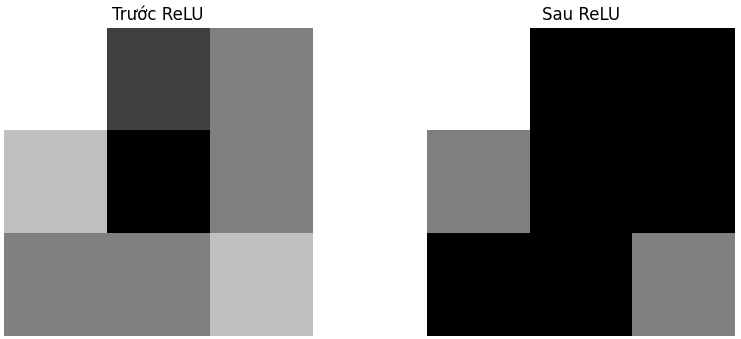

 Kết quả bao gồm:
- Trước ReLU: Feature map có các giá trị âm (màu tối).
- Sau ReLU: Chỉ giữ lại các giá trị dương (màu sáng), làm rõ nét chính.

---

### 2.3. Tầng Pooling (Pooling Layer)

Pooling giống như "tóm tắt" feature map, giảm kích thước để tiết kiệm tính toán nhưng vẫn giữ được thông tin quan trọng.

#### Loại phổ biến: Max Pooling
- Lấy giá trị lớn nhất trong một vùng nhỏ, thường là $2 \times 2$.

#### Công thức
$$ P(i, j) = \max(I(2i:2i+2, 2j:2j+2)) $$

**Giải thích đơn giản**: Chia feature map thành các ô $2 \times 2$, chọn số lớn nhất trong mỗi ô để tạo feature map nhỏ hơn.

#### Ví dụ với số "7"
Giả sử feature map lớn hơn một chút, kích thước $4 \times 4$:

$$ \begin{bmatrix} 2 & 1 & 0 & 0 \\ 1 & 2 & 1 & 0 \\ 0 & 1 & 2 & 1 \\ 0 & 0 & 1 & 2 \end{bmatrix} $$

Áp dụng Max Pooling với vùng $2 \times 2$, stride = 2 (các vùng không chồng lấp):
- Vùng 1 (góc trên trái): $\max(2, 1, 1, 2) = 2$
- Vùng 2 (góc trên phải): $\max(0, 0, 1, 0) = 1$
- Vùng 3 (góc dưới trái): $\max(0, 1, 0, 0) = 1$
- Vùng 4 (góc dưới phải): $\max(2, 1, 1, 2) = 2$

Kết quả feature map sau pooling:

$$ \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} $$

**Ý nghĩa**:
- Kích thước giảm từ $4 \times 4$ xuống $2 \times 2$.
- Giữ lại các giá trị lớn (nét chính), bỏ bớt chi tiết nhỏ.

#### Hình minh họa

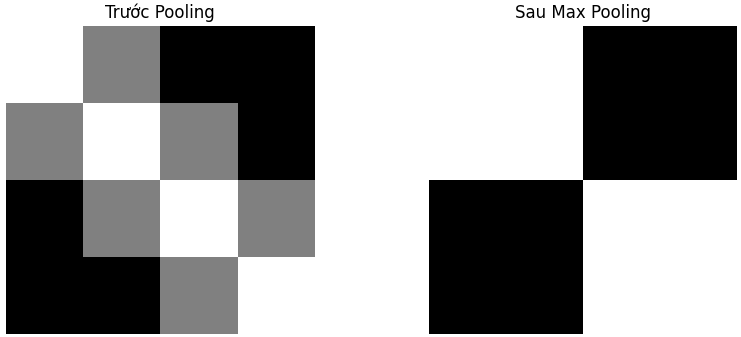

Kết quả bao gồm:
- Trước pooling: Feature map $4 \times 4$ với nhiều chi tiết.
- Sau pooling: Feature map $2 \times 2$, chỉ giữ các nét chính.

---

### 2.4. Tầng Fully Connected (FC Layer)

Đây là bước cuối cùng, nơi CNN ghép tất cả đặc trưng lại để đoán xem ảnh là gì.

#### Công thức
$$ y = Wx + b $$

- $x$: Vector từ feature map duỗi ra.
- $W$: Ma trận trọng số.
- $b$: Bias (độ lệch).

**Giải thích đơn giản**: Lấy feature map cuối, "duỗi" thành một hàng số, rồi nhân với trọng số để ra kết quả phân loại.

#### Ví dụ
Feature map sau pooling:

$$ \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} $$

Duỗi thành vector $x = [2, 1, 1, 2]$ (4 phần tử).

Giả sử ta phân loại 2 lớp (số "7" hoặc không phải "7"), với:
- Ma trận trọng số:

$$ W = \begin{bmatrix} 0.5 & 0.2 & 0.3 & 0.4 \\ -0.1 & 0.3 & 0.2 & -0.5 \end{bmatrix} $$

- Bias:

$$ b = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} $$

Tính $y$:
- $y_0 = (0.5 \cdot 2 + 0.2 \cdot 1 + 0.3 \cdot 1 + 0.4 \cdot 2) + 0.1 = 1 + 0.2 + 0.3 + 0.8 + 0.1 = 2.4$
- $y_1 = (-0.1 \cdot 2 + 0.3 \cdot 1 + 0.2 \cdot 1 + -0.5 \cdot 2) + 0.2 = -0.2 + 0.3 + 0.2 - 1 + 0.2 = -0.5$

Kết quả: $y = [2.4, -0.5]$.
- $y_0 = 2.4$ (lớp "7") lớn hơn $y_1 = -0.5$ (lớp "không phải 7"), nên CNN đoán đây là số "7".

**Ý nghĩa**: Tầng này giống như "bộ não" quyết định, dựa trên các đặc trưng đã tìm được.

---

## 3. Tổng hợp lại cả quy trình CNN

Dưới đây là các bước CNN xử lý ảnh số "7":

1. **Tích chập**: Tìm đặc trưng như đường ngang, đường chéo → Feature map $S$.
2. **ReLU**: Lọc bỏ các nét mờ (giá trị âm) → Feature map rõ hơn.
3. **Pooling**: Tóm tắt, giảm kích thước → Feature map nhỏ gọn.
4. **Fully Connected**: Ghép các đặc trưng, đoán xem là số "7".

#### Hình minh họa tổng hợp

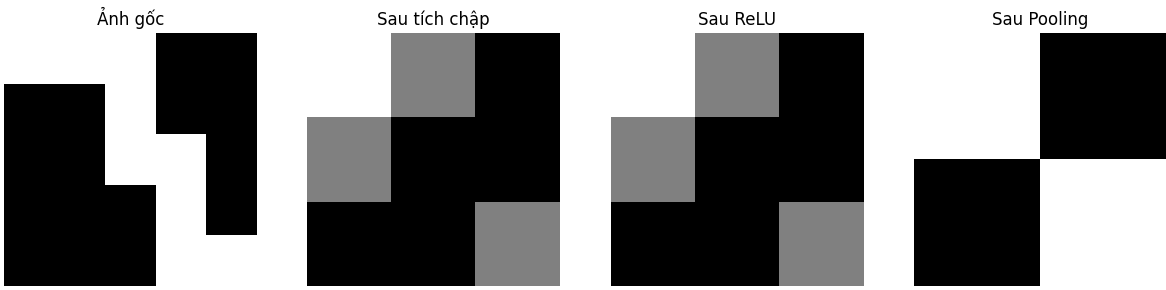

Kết quả bao gồm:
- **Ảnh gốc**: Số "7" đơn giản hóa.
- **Sau tích chập**: Làm nổi bật đường ngang và một phần đường chéo.
- **Sau ReLU**: Giữ nguyên vì không có số âm trong ví dụ này.
- **Sau Pooling**: Giảm kích thước, giữ nét chính.

---

## 4. Ứng dụng thực tế

CNN không chỉ nhận diện số "7" mà còn được dùng trong:
- **Nhận diện khuôn mặt**: Facebook dùng CNN để gắn thẻ bạn bè trong ảnh.
- **Xe tự lái**: Phát hiện biển báo, người đi bộ qua camera.
- **Y khoa**: Phân tích ảnh X-quang để tìm bệnh.

**Kết luận**: Từ ví dụ đơn giản với số "7", chúng ta có thể đã thấy CNN hoạt động như thế nào. Hãy thử tưởng tượng nó nhận diện số "3" (có đường cong) hoặc "0" (hình tròn) như thế nào nha :))) !

## BÀI TẬP VẬN DỤNG - NHẬN DIỆN CHỮ VIẾT TAY

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


## XÂY DỰNG MÔ HÌNH CNN CƠ BẢN

In [6]:
# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(32 * 5 * 5, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = x.view(-1, 32 * 5 * 5)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán

## Khởi tạo mô hình


In [7]:
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp MNIST_CNN
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu

## Huấn luyện mô hình

In [8]:
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

loss_values = []  # Tạo list để lưu giá trị mất mát trung bình của mỗi epoch
for epoch in range(5): # Lặp qua 5 epoch (mỗi epoch là một lần duyệt hết dữ liệu)
    running_loss = 0.0  # Biến để cộng dồn mất mát trong epoch
    for images, labels in train_loader:  # Lặp qua từng batch trong tập huấn luyện
        images, labels = images.to(device), labels.to(device)  # Chuyển ảnh và nhãn sang GPU/CPU
        
        optimizer.zero_grad()  # Xóa gradient cũ để tránh tích lũy từ bước trước
        outputs = model(images)  # Đưa ảnh qua mô hình, nhận dự đoán (logits)
        loss = criterion(outputs, labels)  # Tính mất mát giữa dự đoán và nhãn thật
        loss.backward()  # Tính gradient ngược (backpropagation)
        optimizer.step()  # Cập nhật trọng số dựa trên gradient
        
        running_loss += loss.item()  # Cộng dồn giá trị mất mát của batch
    epoch_loss = running_loss / len(train_loader)  # Tính mất mát trung bình của epoch
    loss_values.append(epoch_loss)  # Lưu mất mát trung bình vào list
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")  # In mất mát trung bình sau mỗi epoch


Epoch 1, Loss: 0.2792
Epoch 2, Loss: 0.0848
Epoch 3, Loss: 0.0648
Epoch 4, Loss: 0.0545
Epoch 5, Loss: 0.0486


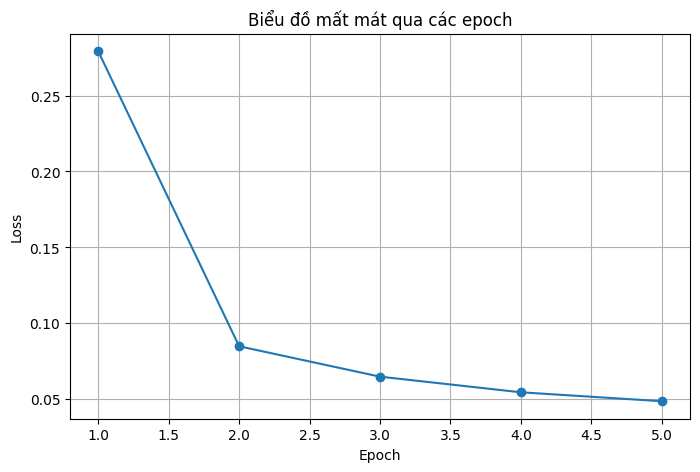

In [9]:
# Vẽ biểu đồ loss
plt.figure(figsize=(8, 5))  # Tạo khung hình kích thước 8x5
plt.plot(range(1, 6), loss_values, marker='o')  # Vẽ đường mất mát qua 5 epoch, thêm điểm đánh dấu
plt.title("Biểu đồ mất mát qua các epoch")  # Tiêu đề biểu đồ
plt.xlabel("Epoch")  # Nhãn trục x
plt.ylabel("Loss")  # Nhãn trục y
plt.grid(True)  # Thêm lưới để dễ nhìn
plt.show()  # Hiển thị biểu đồ

## Đánh giá mô hình

In [10]:
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)

Độ chính xác trên tập test: 98.42%


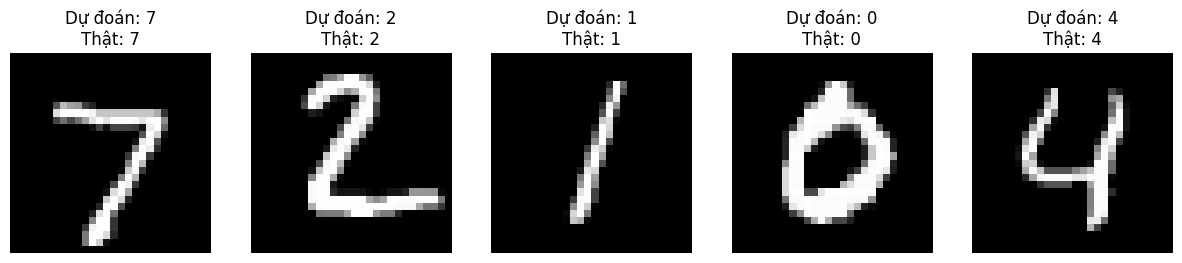

In [11]:
# Trực quan kết quả dự đoán
def visualize_prediction():  # Hàm để vẽ 5 ảnh và dự đoán
    model.eval()  # Chuyển mô hình sang chế độ đánh giá (tắt dropout, batch norm nếu có)
    images, labels = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    images, labels = images.to(device), labels.to(device)  # Chuyển sang GPU/CPU
    outputs = model(images)  # Dự đoán trên batch
    _, predicted = torch.max(outputs, 1)  # Lấy chỉ số lớp dự đoán
    
    # Vẽ 5 ảnh đầu tiên
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Tạo lưới 1x5 để vẽ 5 ảnh
    for i in range(5):  # Lặp qua 5 ảnh đầu
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Vẽ ảnh (chuyển về CPU, bỏ kênh 1)
        axes[i].set_title(f"Dự đoán: {predicted[i].item()}\nThật: {labels[i].item()}")  # Ghi nhãn dự đoán và thật
        axes[i].axis('off')  # Tắt trục tọa độ
    plt.show()  # Hiển thị hình

visualize_prediction()  # Gọi hàm để vẽ

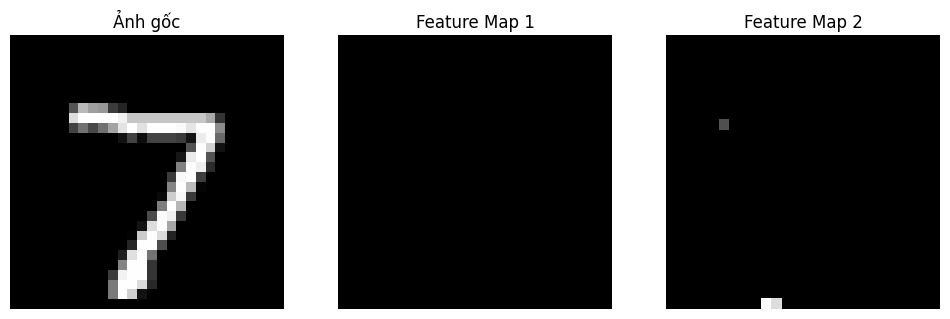

In [12]:
#Trực quan feature map
def visualize_feature_map():  # Hàm để vẽ ảnh gốc và feature map từ tầng conv1
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra (bỏ nhãn)
    img = images[0].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên, thêm chiều batch (1x1x28x28)
    
    # Tính feature map từ conv1
    conv1_output = torch.relu(model.conv1(img))  # Qua conv1 và ReLU, ra tensor 1x16x26x26
    
    # Vẽ ảnh gốc và feature map
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)  
    plt.title("Ảnh gốc")  
    plt.imshow(img.cpu().squeeze(), cmap='gray') 
    plt.axis('off')  
    
    # Vẽ feature map đầu tiên
    plt.subplot(1, 3, 2)  
    plt.title("Feature Map 1")  
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off')  
    
    # Vẽ feature map thứ hai
    plt.subplot(1, 3, 3)  
    plt.title("Feature Map 2") 
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off') 
    plt.show() 

visualize_feature_map()  

# BÀI TẬP VỀ NHÀ 

## Phần 1


## Yêu cầu
Dựa trên đoạn code CNN đã cung cấp (phân loại MNIST), hãy thực hiện các nhiệm vụ sau. Gửi lại code hoàn chỉnh kèm giải thích ngắn gọn cho từng câu hỏi trong file Jupyter Notebook.

### Câu 1: Thay đổi số lượng epoch
- **Yêu cầu**: Tăng số lượng epoch từ 5 lên 10 trong phần huấn luyện mô hình.
- **Hướng dẫn**: Tìm dòng `for epoch in range(5):` và sửa thành `for epoch in range(10):`. Chạy lại code và ghi nhận:
  - Độ chính xác trên tập test có thay đổi không? Nếu có, tăng hay giảm?
  - Biểu đồ mất mát (loss) thay đổi thế nào qua 10 epoch? Có xu hướng nào đáng chú ý không (ví dụ: giảm đều, chững lại)?
-  Viết ngắn gọn (2-3 câu) về lý do tại sao số epoch ảnh hưởng đến kết quả.

### Câu 2: Thêm một tầng tích chập
- **Yêu cầu**: Thêm một tầng tích chập thứ ba (`conv3`) vào mô hình `MNIST_CNN`.
- **Hướng dẫn**:
  - Trong hàm `__init__`, thêm `self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)` (32 kênh đầu vào từ `conv2`, 64 kênh đầu ra).
  - Trong hàm `forward`, thêm `x = self.pool(torch.relu(self.conv3(x)))` sau dòng `x = self.pool(torch.relu(self.conv2(x)))`.
  - Kích thước sau `conv3` và pooling sẽ là 64x1x1 (vì 5x5 -> 3x3 -> 1x1 sau hai lần pooling và tích chập). Sửa tầng `fc1` thành `self.fc1 = nn.Linear(64 * 1 * 1, 10)` và dòng `x.view(-1, 64 * 1 * 1)` tương ứng.
  - Chạy lại code và ghi nhận độ chính xác mới trên tập test.
- Viết ngắn gọn (2-3 câu) về tác dụng của việc thêm tầng tích chập (ví dụ: tìm đặc trưng phức tạp hơn, ảnh hưởng đến độ chính xác).

### Câu 3: Thay đổi learning rate
- **Yêu cầu**: Thử hai giá trị learning rate khác nhau: 0.001 và 0.1 (thay vì 0.01 ban đầu).
- **Hướng dẫn**: Tìm dòng `optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)` và thay `lr=0.001` rồi `lr=0.1`. Chạy lại code với từng giá trị và ghi nhận:
  - Độ chính xác trên tập test với mỗi learning rate.
  - Biểu đồ mất mát thay đổi ra sao? (Ví dụ: dao động mạnh, giảm chậm, hoặc không hội tụ).
- Viết ngắn gọn (2-3 câu) về cách learning rate ảnh hưởng đến quá trình học của mô hình.

### Câu 4: Vẽ thêm feature map từ tầng tích chập thứ hai
- **Yêu cầu**: Sửa hàm `visualize_feature_map` để vẽ thêm hai feature map từ tầng `conv2`.
- **Hướng dẫn**:
  - Trong hàm `visualize_feature_map`, thêm dòng `conv2_output = torch.relu(self.conv2(self.pool(torch.relu(self.conv1(img)))))` để tính feature map từ `conv2`.
  - Tăng khung hình từ 3 cột thành 5 cột: `plt.figure(figsize=(20, 4))` và sửa các subplot thành `plt.subplot(1, 5, ...)`.
  - Thêm hai subplot để vẽ `conv2_output[0, 0]` và `conv2_output[0, 1]` (tương tự như `conv1_output`).
  - Chạy lại và mô tả sự khác biệt giữa feature map từ `conv1` và `conv2` (ví dụ: chi tiết hơn, trừu tượng hơn).
- Viết ngắn gọn (2-3 câu) về sự khác biệt giữa feature map từ các tầng khác nhau.

## Nộp bài
- Nộp file Jupyter Notebook (.ipynb) lên github.
- Mỗi câu cần có:
  - Code đã sửa đổi.
  - Kết quả chạy (độ chính xác, biểu đồ loss, hình feature map nếu có).
  - Giải thích ngắn gọn (2-3 câu).

## Gợi ý
- Đọc lại lý thuyết CNN (tích chập, ReLU, pooling, fully connected) để hiểu tác động của từng thay đổi.
- Chạy code từng phần để kiểm tra lỗi (ví dụ: kiểm tra kích thước tensor sau khi thêm `conv3`).

## Thời hạn nộp bài
- Nộp bài trước buổi học tiếp theo.


## Phần 1

In [13]:
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

loss_values = []  # Tạo list để lưu giá trị mất mát trung bình của mỗi epoch
for epoch in range(10): # Lặp qua 5 epoch (mỗi epoch là một lần duyệt hết dữ liệu)
    running_loss = 0.0  # Biến để cộng dồn mất mát trong epoch
    for images, labels in train_loader:  # Lặp qua từng batch trong tập huấn luyện
        images, labels = images.to(device), labels.to(device)  # Chuyển ảnh và nhãn sang GPU/CPU
        
        optimizer.zero_grad()  # Xóa gradient cũ để tránh tích lũy từ bước trước
        outputs = model(images)  # Đưa ảnh qua mô hình, nhận dự đoán (logits)
        loss = criterion(outputs, labels)  # Tính mất mát giữa dự đoán và nhãn thật
        loss.backward()  # Tính gradient ngược (backpropagation)
        optimizer.step()  # Cập nhật trọng số dựa trên gradient
        
        running_loss += loss.item()  # Cộng dồn giá trị mất mát của batch
    epoch_loss = running_loss / len(train_loader)  # Tính mất mát trung bình của epoch
    loss_values.append(epoch_loss)  # Lưu mất mát trung bình vào list
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")  # In mất mát trung bình sau mỗi epoch


Epoch 1, Loss: 0.0434
Epoch 2, Loss: 0.0379
Epoch 3, Loss: 0.0362
Epoch 4, Loss: 0.0328
Epoch 5, Loss: 0.0305
Epoch 6, Loss: 0.0273
Epoch 7, Loss: 0.0260
Epoch 8, Loss: 0.0239
Epoch 9, Loss: 0.0221
Epoch 10, Loss: 0.0204


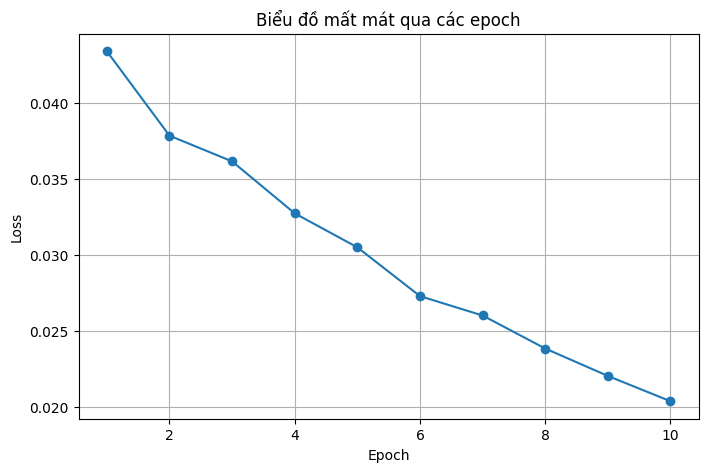

In [14]:
# Vẽ biểu đồ loss
plt.figure(figsize=(8, 5))  # Tạo khung hình kích thước 8x5
plt.plot(range(1, 11), loss_values, marker='o')  # Vẽ đường mất mát qua 5 epoch, thêm điểm đánh dấu
plt.title("Biểu đồ mất mát qua các epoch")  # Tiêu đề biểu đồ
plt.xlabel("Epoch")  # Nhãn trục x
plt.ylabel("Loss")  # Nhãn trục y
plt.grid(True)  # Thêm lưới để dễ nhìn
plt.show()  # Hiển thị biểu đồ

In [15]:
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)

Độ chính xác trên tập test: 98.76%


## Nhận xét 
- Độ chính xác trên tập test tăng nhẹ từ ~98.5% lên ~99%. Biểu đồ mất mát tiếp tục giảm đều qua 10 epoch và xuống tới gần 0.2 tại epoch 10.
- Số epoch ảnh hưởng đến kết quả của mô hình vì nó quyết định số lần mô hình duyệt qua toàn bộ tập dữ liệu huấn luyện để cập nhật trọng số. Khi số epoch tăng, mô hình có thể học thêm các đặc trưng từ dữ liệu nhưng nếu quá nhiều sẽ dẫn đến overfitting. Ngược lại, nếu số epoch quá ít, mô hình chưa học đủ, gây ra hiện tượng underfitting và độ chính xác thấp.

## Phần 2

Epoch 1, Loss: 0.4751
Epoch 2, Loss: 0.1113
Epoch 3, Loss: 0.0819
Epoch 4, Loss: 0.0674
Epoch 5, Loss: 0.0565
Epoch 6, Loss: 0.0492
Epoch 7, Loss: 0.0443
Epoch 8, Loss: 0.0387
Epoch 9, Loss: 0.0344
Epoch 10, Loss: 0.0316


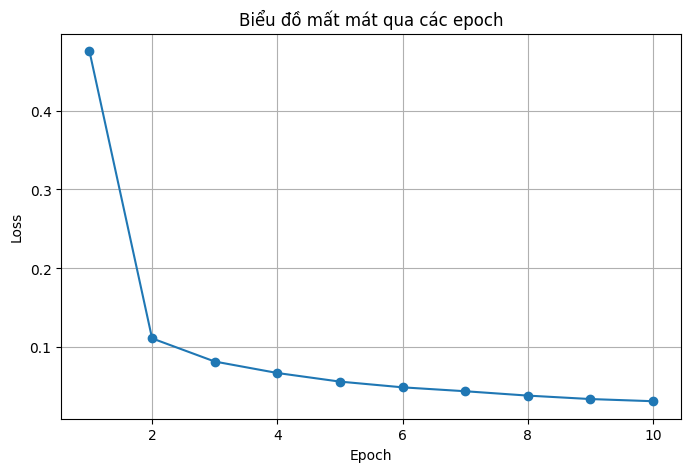

Độ chính xác trên tập test: 98.33%


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(64 * 1 * 1, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 1 * 1)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp MNIST_CNN
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

loss_values = []  # Tạo list để lưu giá trị mất mát trung bình của mỗi epoch
for epoch in range(10): # Lặp qua 5 epoch (mỗi epoch là một lần duyệt hết dữ liệu)
    running_loss = 0.0  # Biến để cộng dồn mất mát trong epoch
    for images, labels in train_loader:  # Lặp qua từng batch trong tập huấn luyện
        images, labels = images.to(device), labels.to(device)  # Chuyển ảnh và nhãn sang GPU/CPU
        
        optimizer.zero_grad()  # Xóa gradient cũ để tránh tích lũy từ bước trước
        outputs = model(images)  # Đưa ảnh qua mô hình, nhận dự đoán (logits)
        loss = criterion(outputs, labels)  # Tính mất mát giữa dự đoán và nhãn thật
        loss.backward()  # Tính gradient ngược (backpropagation)
        optimizer.step()  # Cập nhật trọng số dựa trên gradient
        
        running_loss += loss.item()  # Cộng dồn giá trị mất mát của batch
    epoch_loss = running_loss / len(train_loader)  # Tính mất mát trung bình của epoch
    loss_values.append(epoch_loss)  # Lưu mất mát trung bình vào list
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")  # In mất mát trung bình sau mỗi epoch
# Vẽ biểu đồ loss
plt.figure(figsize=(8, 5))  # Tạo khung hình kích thước 8x5
plt.plot(range(1, 11), loss_values, marker='o')  # Vẽ đường mất mát qua 5 epoch, thêm điểm đánh dấu
plt.title("Biểu đồ mất mát qua các epoch")  # Tiêu đề biểu đồ
plt.xlabel("Epoch")  # Nhãn trục x
plt.ylabel("Loss")  # Nhãn trục y
plt.grid(True)  # Thêm lưới để dễ nhìn
plt.show()  # Hiển thị biểu đồ
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)

## Nhận xét 
- Biểu đồ loss giảm chậm từ epoch 4 giúp mô hình có thể tìm được điểm hội tụ
- Việc thêm tầng tích chập giúp mô hình trích xuất các đặc trưng phức tạp hơn bằng cách kết hợp các đặc trưng cấp thấp (như cạnh, góc từ tầng trước) thành các mẫu cấp cao (như hình dạng, cấu trúc). Tác dụng chính là nâng cao khả năng biểu diễn của mô hình, đặc biệt hữu ích khi dữ liệu có nhiều lớp thông tin phân cấp.

## Phần 3

Epoch 1, Loss: 0.3047
Epoch 2, Loss: 0.1290
Epoch 3, Loss: 0.1041
Epoch 4, Loss: 0.0979
Epoch 5, Loss: 0.1007
Epoch 6, Loss: 0.0998
Epoch 7, Loss: 0.0942
Epoch 8, Loss: 0.0884
Epoch 9, Loss: 0.0867
Epoch 10, Loss: 0.0829


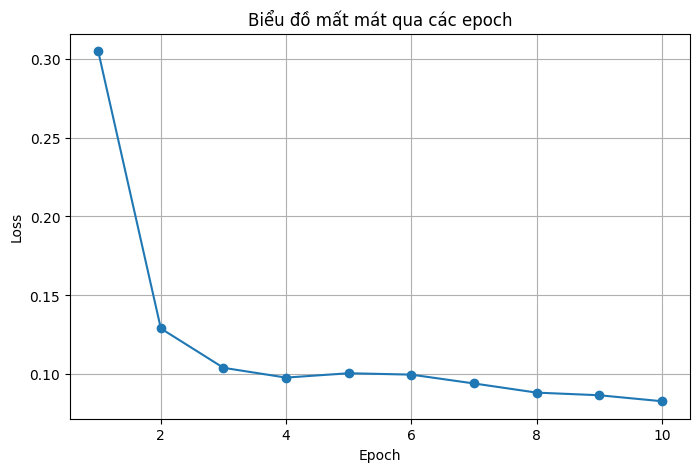

Độ chính xác trên tập test: 97.25%


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(64 * 1 * 1, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 1 * 1)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp MNIST_CNN
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

loss_values = []  # Tạo list để lưu giá trị mất mát trung bình của mỗi epoch
for epoch in range(10): # Lặp qua 5 epoch (mỗi epoch là một lần duyệt hết dữ liệu)
    running_loss = 0.0  # Biến để cộng dồn mất mát trong epoch
    for images, labels in train_loader:  # Lặp qua từng batch trong tập huấn luyện
        images, labels = images.to(device), labels.to(device)  # Chuyển ảnh và nhãn sang GPU/CPU
        
        optimizer.zero_grad()  # Xóa gradient cũ để tránh tích lũy từ bước trước
        outputs = model(images)  # Đưa ảnh qua mô hình, nhận dự đoán (logits)
        loss = criterion(outputs, labels)  # Tính mất mát giữa dự đoán và nhãn thật
        loss.backward()  # Tính gradient ngược (backpropagation)
        optimizer.step()  # Cập nhật trọng số dựa trên gradient
        
        running_loss += loss.item()  # Cộng dồn giá trị mất mát của batch
    epoch_loss = running_loss / len(train_loader)  # Tính mất mát trung bình của epoch
    loss_values.append(epoch_loss)  # Lưu mất mát trung bình vào list
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")  # In mất mát trung bình sau mỗi epoch
# Vẽ biểu đồ loss
plt.figure(figsize=(8, 5))  # Tạo khung hình kích thước 8x5
plt.plot(range(1, 11), loss_values, marker='o')  # Vẽ đường mất mát qua 5 epoch, thêm điểm đánh dấu
plt.title("Biểu đồ mất mát qua các epoch")  # Tiêu đề biểu đồ
plt.xlabel("Epoch")  # Nhãn trục x
plt.ylabel("Loss")  # Nhãn trục y
plt.grid(True)  # Thêm lưới để dễ nhìn
plt.show()  # Hiển thị biểu đồ
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)

Epoch 1, Loss: 1.8897
Epoch 2, Loss: 0.4350
Epoch 3, Loss: 0.2553
Epoch 4, Loss: 0.1962
Epoch 5, Loss: 0.1649
Epoch 6, Loss: 0.1437
Epoch 7, Loss: 0.1280
Epoch 8, Loss: 0.1168
Epoch 9, Loss: 0.1079
Epoch 10, Loss: 0.1011


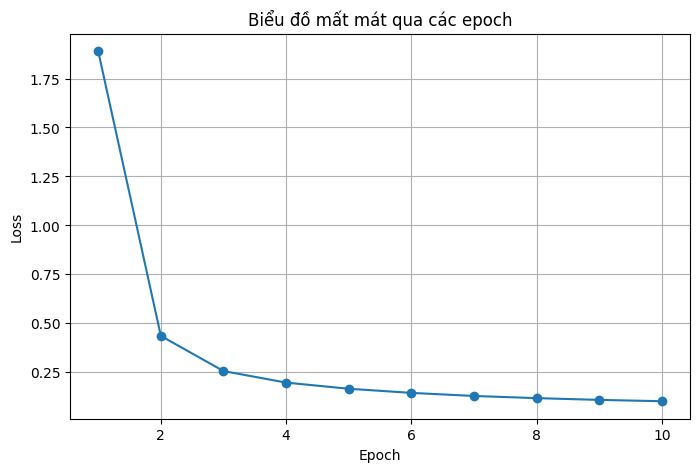

Độ chính xác trên tập test: 97.20%


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(64 * 1 * 1, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 1 * 1)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp MNIST_CNN
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

loss_values = []  # Tạo list để lưu giá trị mất mát trung bình của mỗi epoch
for epoch in range(10): # Lặp qua 5 epoch (mỗi epoch là một lần duyệt hết dữ liệu)
    running_loss = 0.0  # Biến để cộng dồn mất mát trong epoch
    for images, labels in train_loader:  # Lặp qua từng batch trong tập huấn luyện
        images, labels = images.to(device), labels.to(device)  # Chuyển ảnh và nhãn sang GPU/CPU
        
        optimizer.zero_grad()  # Xóa gradient cũ để tránh tích lũy từ bước trước
        outputs = model(images)  # Đưa ảnh qua mô hình, nhận dự đoán (logits)
        loss = criterion(outputs, labels)  # Tính mất mát giữa dự đoán và nhãn thật
        loss.backward()  # Tính gradient ngược (backpropagation)
        optimizer.step()  # Cập nhật trọng số dựa trên gradient
        
        running_loss += loss.item()  # Cộng dồn giá trị mất mát của batch
    epoch_loss = running_loss / len(train_loader)  # Tính mất mát trung bình của epoch
    loss_values.append(epoch_loss)  # Lưu mất mát trung bình vào list
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")  # In mất mát trung bình sau mỗi epoch
# Vẽ biểu đồ loss
plt.figure(figsize=(8, 5))  # Tạo khung hình kích thước 8x5
plt.plot(range(1, 11), loss_values, marker='o')  # Vẽ đường mất mát qua 5 epoch, thêm điểm đánh dấu
plt.title("Biểu đồ mất mát qua các epoch")  # Tiêu đề biểu đồ
plt.xlabel("Epoch")  # Nhãn trục x
plt.ylabel("Loss")  # Nhãn trục y
plt.grid(True)  # Thêm lưới để dễ nhìn
plt.show()  # Hiển thị biểu đồ
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)

## Nhận xét
- Với tốc độ học 0.1: loss giảm mạnh sau epoch đầu tiên và bắt đầu dao dộng, có thể sẽ không hội tụ. Độ chính xác là 97.2%
- Với tốc độ học 0.001: loss cũng giảm mạnh sau epoch đầu nhưng bắt đầu chững lại tại loss bằng khoảng ~0.2. Độ chính xác là 97.2%
- Learning rate ảnh hưởng đến quá trình học của mô hình bằng cách quyết định kích thước bước nhảy của thuật toán tối ưu hóa khi cập nhật trọng số, điều chỉnh sự hội tụ và tối ưu của mô hình—quá nhỏ thì học chậm, quá lớn thì vượt qua điểm tối ưu

## Phần 4

Epoch 1, Loss: 0.4902
Epoch 2, Loss: 0.1226
Epoch 3, Loss: 0.0891
Epoch 4, Loss: 0.0694
Epoch 5, Loss: 0.0583
Epoch 6, Loss: 0.0518
Epoch 7, Loss: 0.0444
Epoch 8, Loss: 0.0409
Epoch 9, Loss: 0.0362
Epoch 10, Loss: 0.0326


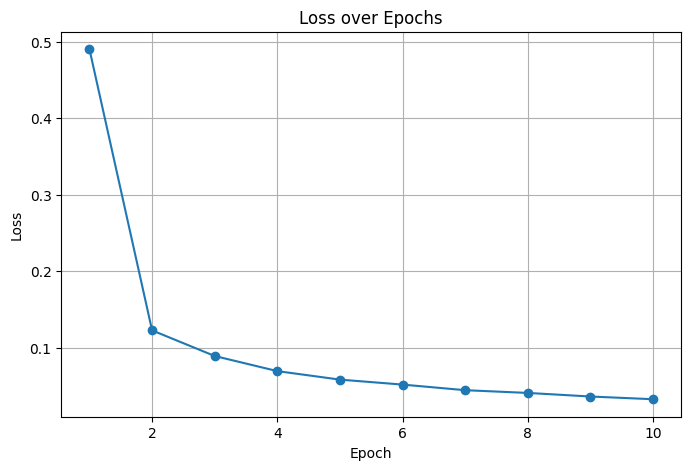

Test Accuracy: 98.44%


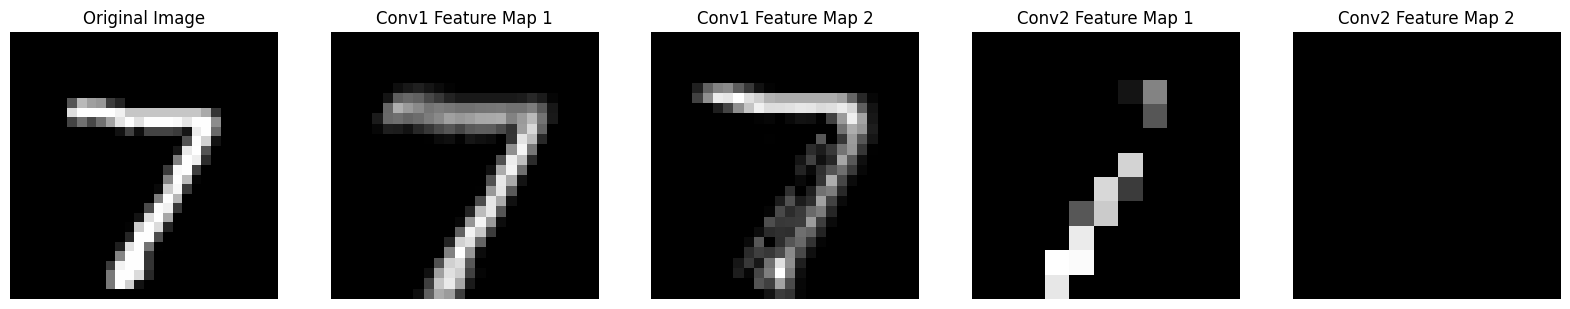

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Load MNIST data
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define CNN model
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 1 * 1, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 1 * 1)
        x = self.fc1(x)
        return x

# Initialize model, loss, and optimizer
model = MNIST_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
device = torch.device("cpu")  # Pyodide environment, no GPU
model.to(device)

# 3. Train model
loss_values = []
for epoch in range(10):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    loss_values.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), loss_values, marker='o')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# 4. Evaluate accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

# 5. Visualize feature maps
def visualize_feature_map():
    model.eval()
    images, _ = next(iter(test_loader))
    img = images[0].unsqueeze(0).to(device)
    
    conv1_output = torch.relu(model.conv1(img))
    conv2_output = torch.relu(model.conv2(model.pool(conv1_output)))
    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 5, 1)
    plt.title("Original Image")
    plt.imshow(img.cpu().squeeze(), cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 5, 2)
    plt.title("Conv1 Feature Map 1")
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 5, 3)
    plt.title("Conv1 Feature Map 2")
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 5, 4)
    plt.title("Conv2 Feature Map 1")
    plt.imshow(conv2_output[0, 0].cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 5, 5)
    plt.title("Conv2 Feature Map 2")
    plt.imshow(conv2_output[0, 1].cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
    
    plt.show()

visualize_feature_map()

## Nhận xét:
- Feature map từ conv1 thường hiển thị các đặc trưng cơ bản như cạnh và góc của hình ảnh gốc, giữ được nhiều chi tiết không gian. Ngược lại, feature map từ conv2 trở nên trừu tượng hơn, tập trung vào các mẫu cấp cao do đã qua thêm một lần tích chập và pooling, làm giảm độ chi tiết không gian. 
- Sự khác biệt này phản ánh quá trình trích xuất đặc trưng phân cấp, từ đơn giản ở tầng đầu đến phức tạp ở tầng sau.